# Prior to Data Cleaning

## Review Data & Statistics

In [1]:
# install packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pyplt
from pandas.plotting import  scatter_matrix

# read the csv file
housing = pd.read_csv("Ames_Housing_Cleaned.csv")

In [2]:
# count records, show columns, check for blank cells (none)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Area               2749 non-null   int64 
 1   SalePrice          2749 non-null   int64 
 2   Zoning             2749 non-null   object
 3   LotArea            2749 non-null   int64 
 4   Neighborhood       2749 non-null   object
 5   OverallQuality     2749 non-null   int64 
 6   OverallCondition   2749 non-null   int64 
 7   YearBuilt          2749 non-null   int64 
 8   YearRemodAdd       2749 non-null   int64 
 9   ExteriorQuality    2749 non-null   int64 
 10  ExteriorCondition  2749 non-null   int64 
 11  FullBath           2749 non-null   int64 
 12  HalfBath           2749 non-null   int64 
 13  Bedrooms           2749 non-null   int64 
 14  KitchenQuality     2749 non-null   int64 
 15  TotalRooms         2749 non-null   int64 
 16  MonthSold          2749 non-null   int64 


In [3]:
# how many data points and features?
housing.shape
# 2761 rows, 18 columns

(2749, 18)

In [4]:
# count values per specified column - sorted by ascending index
housing.TotalRooms.value_counts().sort_index(ascending=True)

2       1
3      23
4     172
5     545
6     800
7     615
8     329
9     136
10     79
11     30
12     16
13      1
14      1
15      1
Name: TotalRooms, dtype: int64

In [5]:
#check for null values
housing.isnull().sum()

Area                 0
SalePrice            0
Zoning               0
LotArea              0
Neighborhood         0
OverallQuality       0
OverallCondition     0
YearBuilt            0
YearRemodAdd         0
ExteriorQuality      0
ExteriorCondition    0
FullBath             0
HalfBath             0
Bedrooms             0
KitchenQuality       0
TotalRooms           0
MonthSold            0
YearSold             0
dtype: int64

In [6]:
# print column names
housing.columns

Index(['Area', 'SalePrice', 'Zoning', 'LotArea', 'Neighborhood',
       'OverallQuality', 'OverallCondition', 'YearBuilt', 'YearRemodAdd',
       'ExteriorQuality', 'ExteriorCondition', 'FullBath', 'HalfBath',
       'Bedrooms', 'KitchenQuality', 'TotalRooms', 'MonthSold', 'YearSold'],
      dtype='object')

In [7]:
# look at statistics
print(housing.describe())

              Area      SalePrice        LotArea  OverallQuality  \
count  2749.000000    2749.000000    2749.000000     2749.000000   
mean   1500.078210  179927.060386   10301.968716        6.062568   
std     512.179876   80185.695320    7947.407696        1.384731   
min     334.000000   12789.000000    1300.000000        1.000000   
25%    1117.000000  129000.000000    7599.000000        5.000000   
50%    1440.000000  159000.000000    9576.000000        6.000000   
75%    1746.000000  211000.000000   11664.000000        7.000000   
max    5642.000000  755000.000000  215245.000000       10.000000   

       OverallCondition    YearBuilt  YearRemodAdd  ExteriorQuality  \
count       2749.000000  2749.000000   2749.000000      2749.000000   
mean           5.601310  1970.194980   1983.510731         3.376864   
std            1.114454    29.782591     20.757164         0.572784   
min            1.000000  1872.000000   1950.000000         2.000000   
25%            5.000000  1953.00

In [8]:
#view number of unique values per attribute
housing.nunique()

Area                 1257
SalePrice             967
Zoning                  3
LotArea              1870
Neighborhood           27
OverallQuality         10
OverallCondition        9
YearBuilt             116
YearRemodAdd           61
ExteriorQuality         4
ExteriorCondition       5
FullBath                4
HalfBath                3
Bedrooms                7
KitchenQuality          5
TotalRooms             14
MonthSold              12
YearSold                5
dtype: int64

In [9]:
#view unique values of specified attribute
housing['Zoning'].unique()

array(['RL', 'RH', 'RM'], dtype=object)

In [10]:
#view unique values of specified attribute
housing['Neighborhood'].unique()

array(['Northwest Ames', 'Briardale', 'Gilbert', 'Stone Brook',
       'Northpark Villa', 'Northridge Heights', 'Bloomington Heights',
       'Northridge', 'Somerset', 'Sawyer West', 'Sawyer', 'Greens',
       'Brookside', 'Old Town', 'Iowa DOT and Rail Road', 'Clear Creek',
       'South & West of Iowa State University', 'Edwards',
       'College Creek', 'Crawford', 'Bluestem', 'Mitchell', 'Timberland',
       'Meadow Village', 'Veenker', 'Green Hills', 'Landmark'],
      dtype=object)

# Data Cleaning

## Visualizations & Finding Outliers

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQuality'}>],
       [<AxesSubplot:title={'center':'OverallCondition'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'ExteriorQuality'}>],
       [<AxesSubplot:title={'center':'ExteriorCondition'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'Bedrooms'}>],
       [<AxesSubplot:title={'center':'KitchenQuality'}>,
        <AxesSubplot:title={'center':'TotalRooms'}>,
        <AxesSubplot:title={'center':'MonthSold'}>,
        <AxesSubplot:title={'center':'YearSold'}>]], dtype=object)

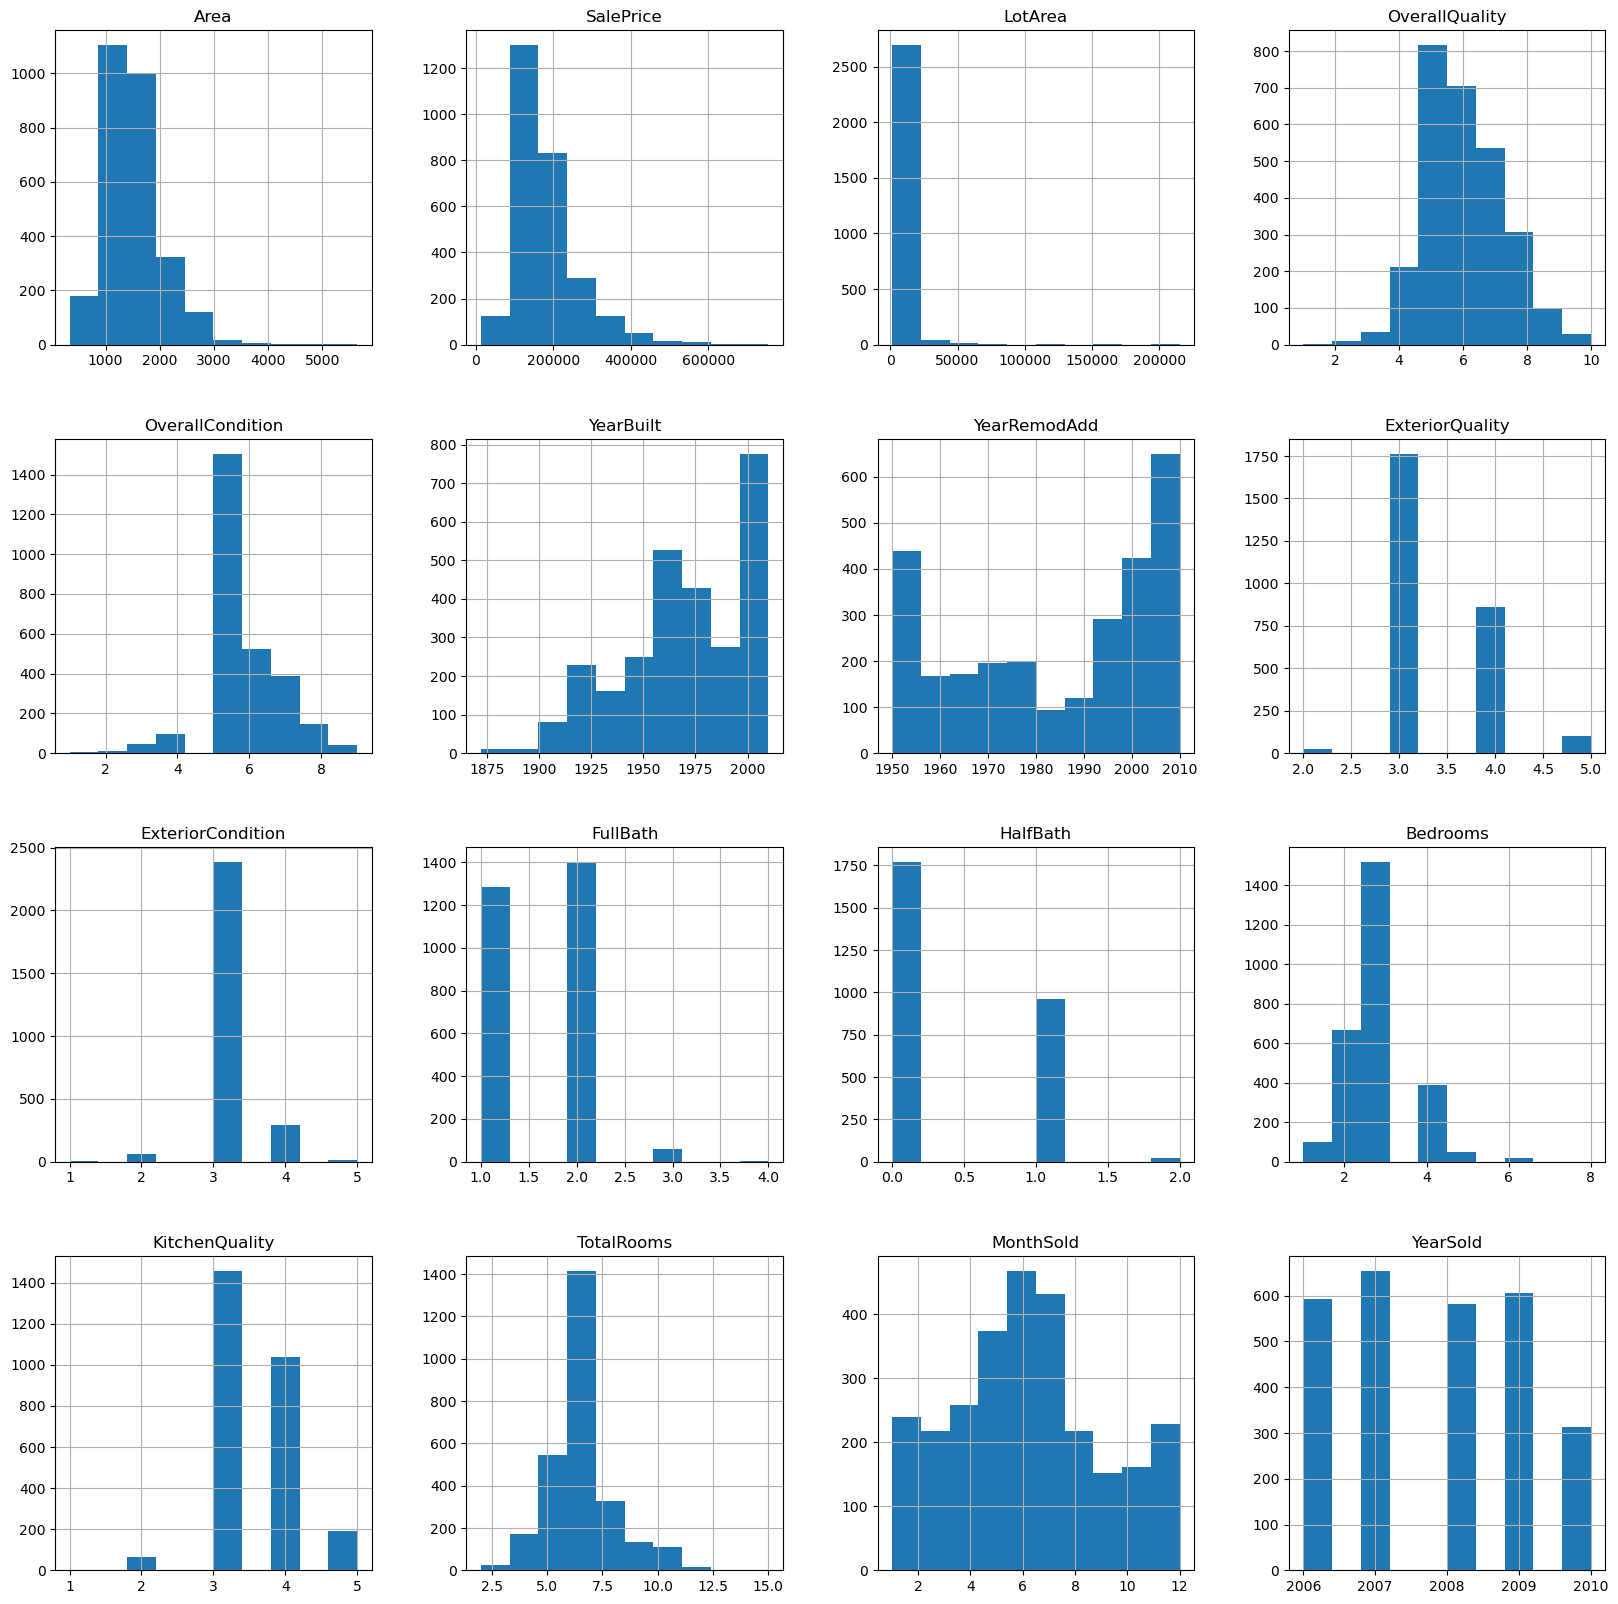

In [11]:
housing.hist(bins=10, figsize=(20,20))

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

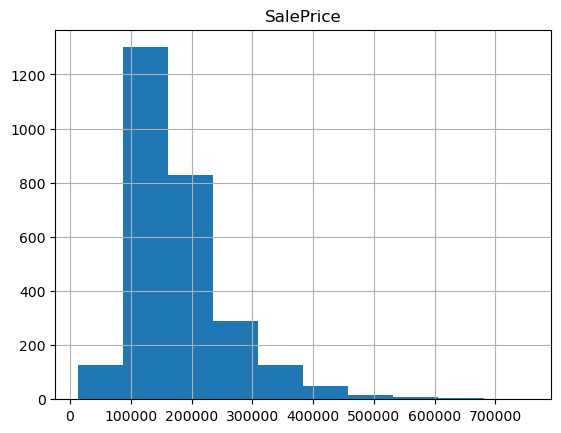

In [12]:
# histogram of sale price
housing.hist('SalePrice')

<AxesSubplot:>

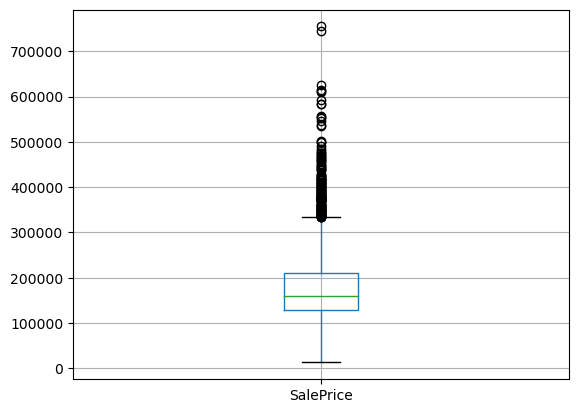

In [13]:
# boxplot of sale price to identify outliers
housing.boxplot('SalePrice')

array([[<AxesSubplot:title={'center':'Area'}>]], dtype=object)

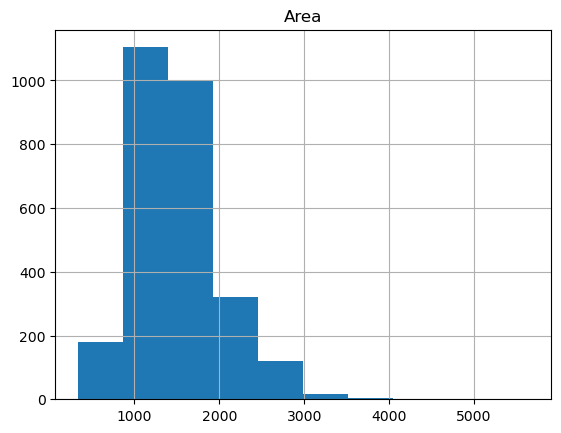

In [14]:
# histogram of Area
housing.hist('Area')

<AxesSubplot:>

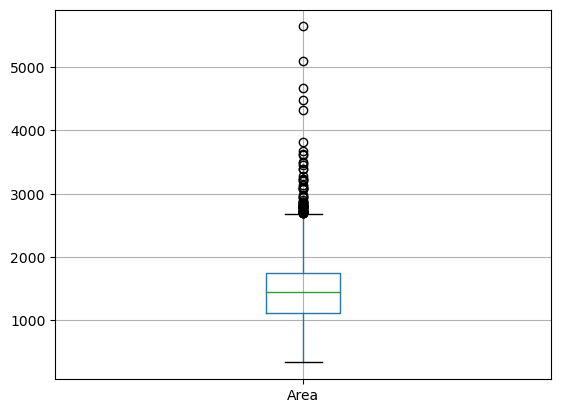

In [15]:
# boxplot of Area to identify outliers
housing.boxplot('Area')

array([[<AxesSubplot:title={'center':'LotArea'}>]], dtype=object)

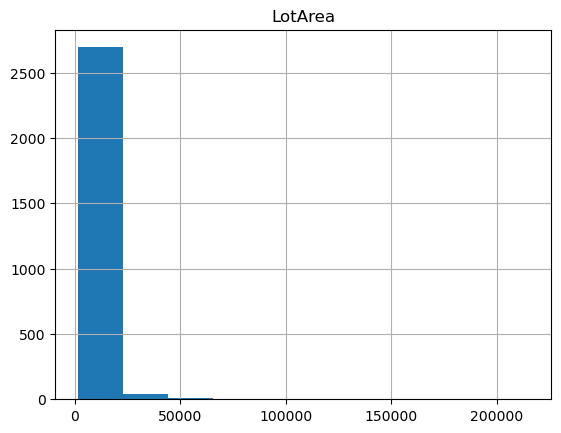

In [16]:
# histogram of LotArea
housing.hist('LotArea')

<AxesSubplot:>

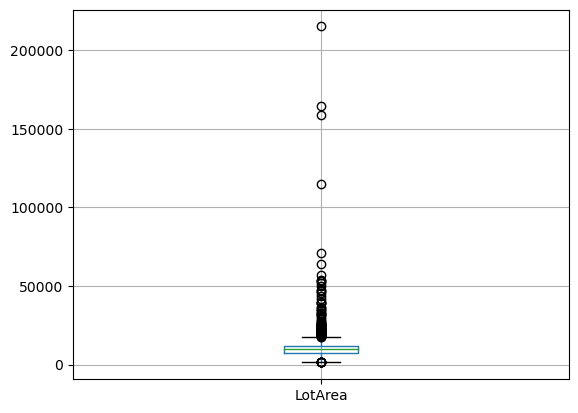

In [17]:
# boxplot of LotArea to identify outliers
housing.boxplot('LotArea')

## Remove Outliers & Look at Distributions Without Outliers

In [18]:
# remove outliers in SalePrice, Area, and LotArea attributes
housing_cleaned = housing[(housing.SalePrice < housing.SalePrice.quantile(.990)) & (housing.Area < housing.Area.quantile(.995)) & (housing.LotArea < housing.LotArea.quantile(.980))]

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

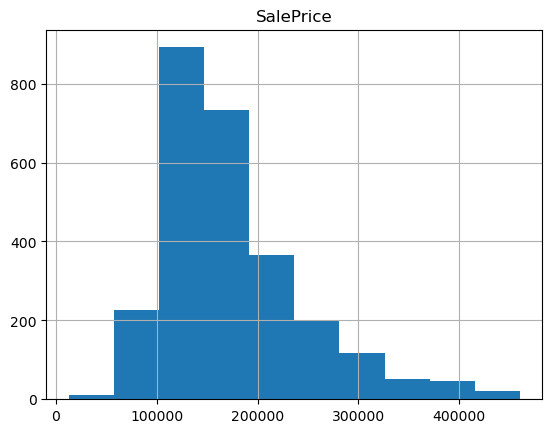

In [19]:
housing_cleaned.hist('SalePrice')

<AxesSubplot:>

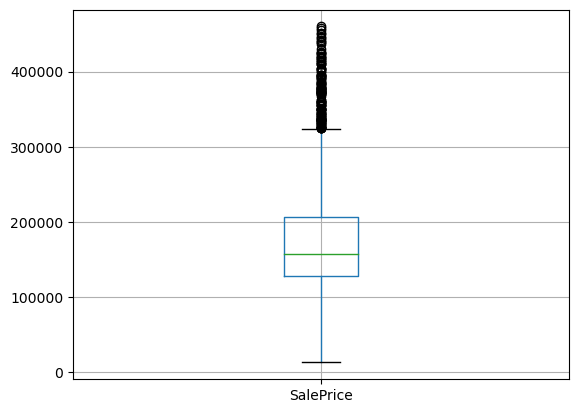

In [20]:
housing_cleaned.boxplot('SalePrice')

array([[<AxesSubplot:title={'center':'Area'}>]], dtype=object)

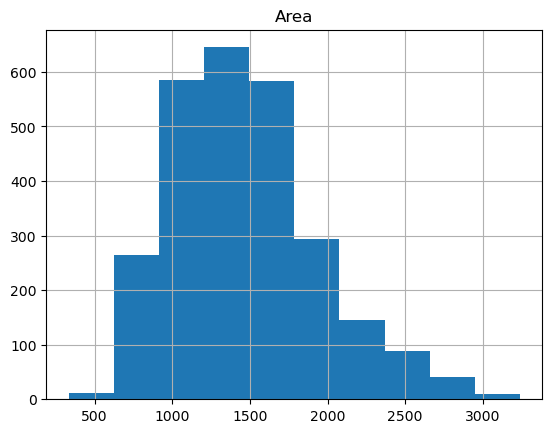

In [21]:
housing_cleaned.hist('Area')

<AxesSubplot:>

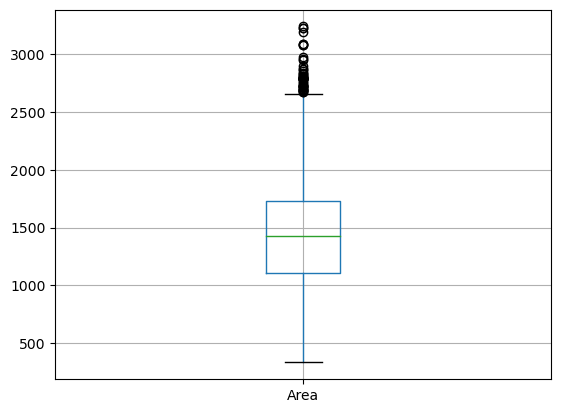

In [22]:
housing_cleaned.boxplot('Area')

array([[<AxesSubplot:title={'center':'LotArea'}>]], dtype=object)

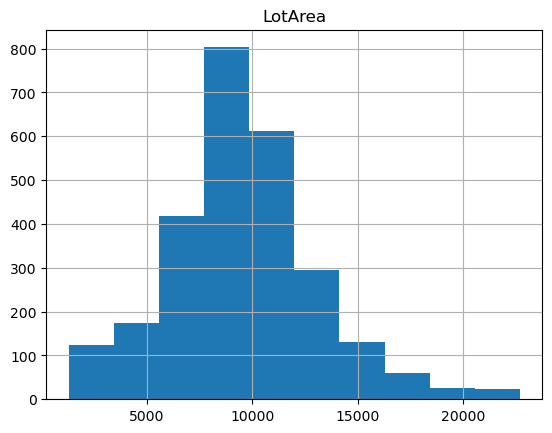

In [23]:
housing_cleaned.hist('LotArea')

<AxesSubplot:>

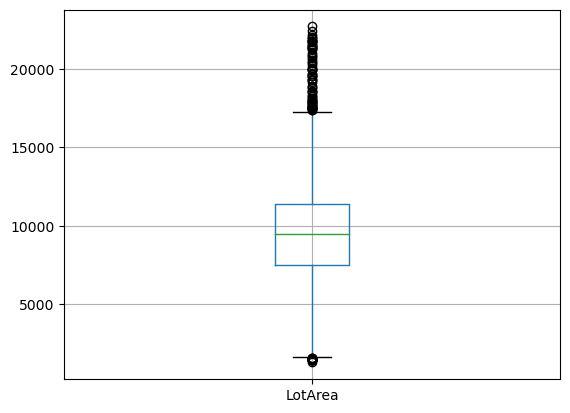

In [24]:
housing_cleaned.boxplot('LotArea')

In [25]:
housing_cleaned.columns

Index(['Area', 'SalePrice', 'Zoning', 'LotArea', 'Neighborhood',
       'OverallQuality', 'OverallCondition', 'YearBuilt', 'YearRemodAdd',
       'ExteriorQuality', 'ExteriorCondition', 'FullBath', 'HalfBath',
       'Bedrooms', 'KitchenQuality', 'TotalRooms', 'MonthSold', 'YearSold'],
      dtype='object')

## Review Data & Statistics (After Data Cleaning)

In [26]:
# count records, show columns, check for blank cells (none)
housing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 1 to 2748
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Area               2666 non-null   int64 
 1   SalePrice          2666 non-null   int64 
 2   Zoning             2666 non-null   object
 3   LotArea            2666 non-null   int64 
 4   Neighborhood       2666 non-null   object
 5   OverallQuality     2666 non-null   int64 
 6   OverallCondition   2666 non-null   int64 
 7   YearBuilt          2666 non-null   int64 
 8   YearRemodAdd       2666 non-null   int64 
 9   ExteriorQuality    2666 non-null   int64 
 10  ExteriorCondition  2666 non-null   int64 
 11  FullBath           2666 non-null   int64 
 12  HalfBath           2666 non-null   int64 
 13  Bedrooms           2666 non-null   int64 
 14  KitchenQuality     2666 non-null   int64 
 15  TotalRooms         2666 non-null   int64 
 16  MonthSold          2666 non-null   int64 


In [27]:
# how many data points and features?
housing_cleaned.shape
# 2666 rows, 18 columns

(2666, 18)

In [28]:
# look at statistics
print(housing_cleaned.describe())

              Area      SalePrice       LotArea  OverallQuality  \
count  2666.000000    2666.000000   2666.000000     2666.000000   
mean   1472.005626  175206.684546   9542.076894        6.025506   
std     467.299211   70611.422586   3523.166676        1.344332   
min     334.000000   12789.000000   1300.000000        1.000000   
25%    1109.250000  128212.500000   7500.000000        5.000000   
50%    1428.500000  157500.000000   9467.000000        6.000000   
75%    1728.000000  206820.000000  11407.750000        7.000000   
max    3238.000000  460000.000000  22692.000000       10.000000   

       OverallCondition    YearBuilt  YearRemodAdd  ExteriorQuality  \
count       2666.000000  2666.000000   2666.000000      2666.000000   
mean           5.607277  1970.045011   1983.326332         3.363466   
std            1.108693    29.711020     20.763549         0.554971   
min            1.000000  1872.000000   1950.000000         2.000000   
25%            5.000000  1953.000000   19

# Exploratory Data Analysis

## Univariate Visualizations

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQuality'}>],
       [<AxesSubplot:title={'center':'OverallCondition'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'ExteriorQuality'}>],
       [<AxesSubplot:title={'center':'ExteriorCondition'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'Bedrooms'}>],
       [<AxesSubplot:title={'center':'KitchenQuality'}>,
        <AxesSubplot:title={'center':'TotalRooms'}>,
        <AxesSubplot:title={'center':'MonthSold'}>,
        <AxesSubplot:title={'center':'YearSold'}>]], dtype=object)

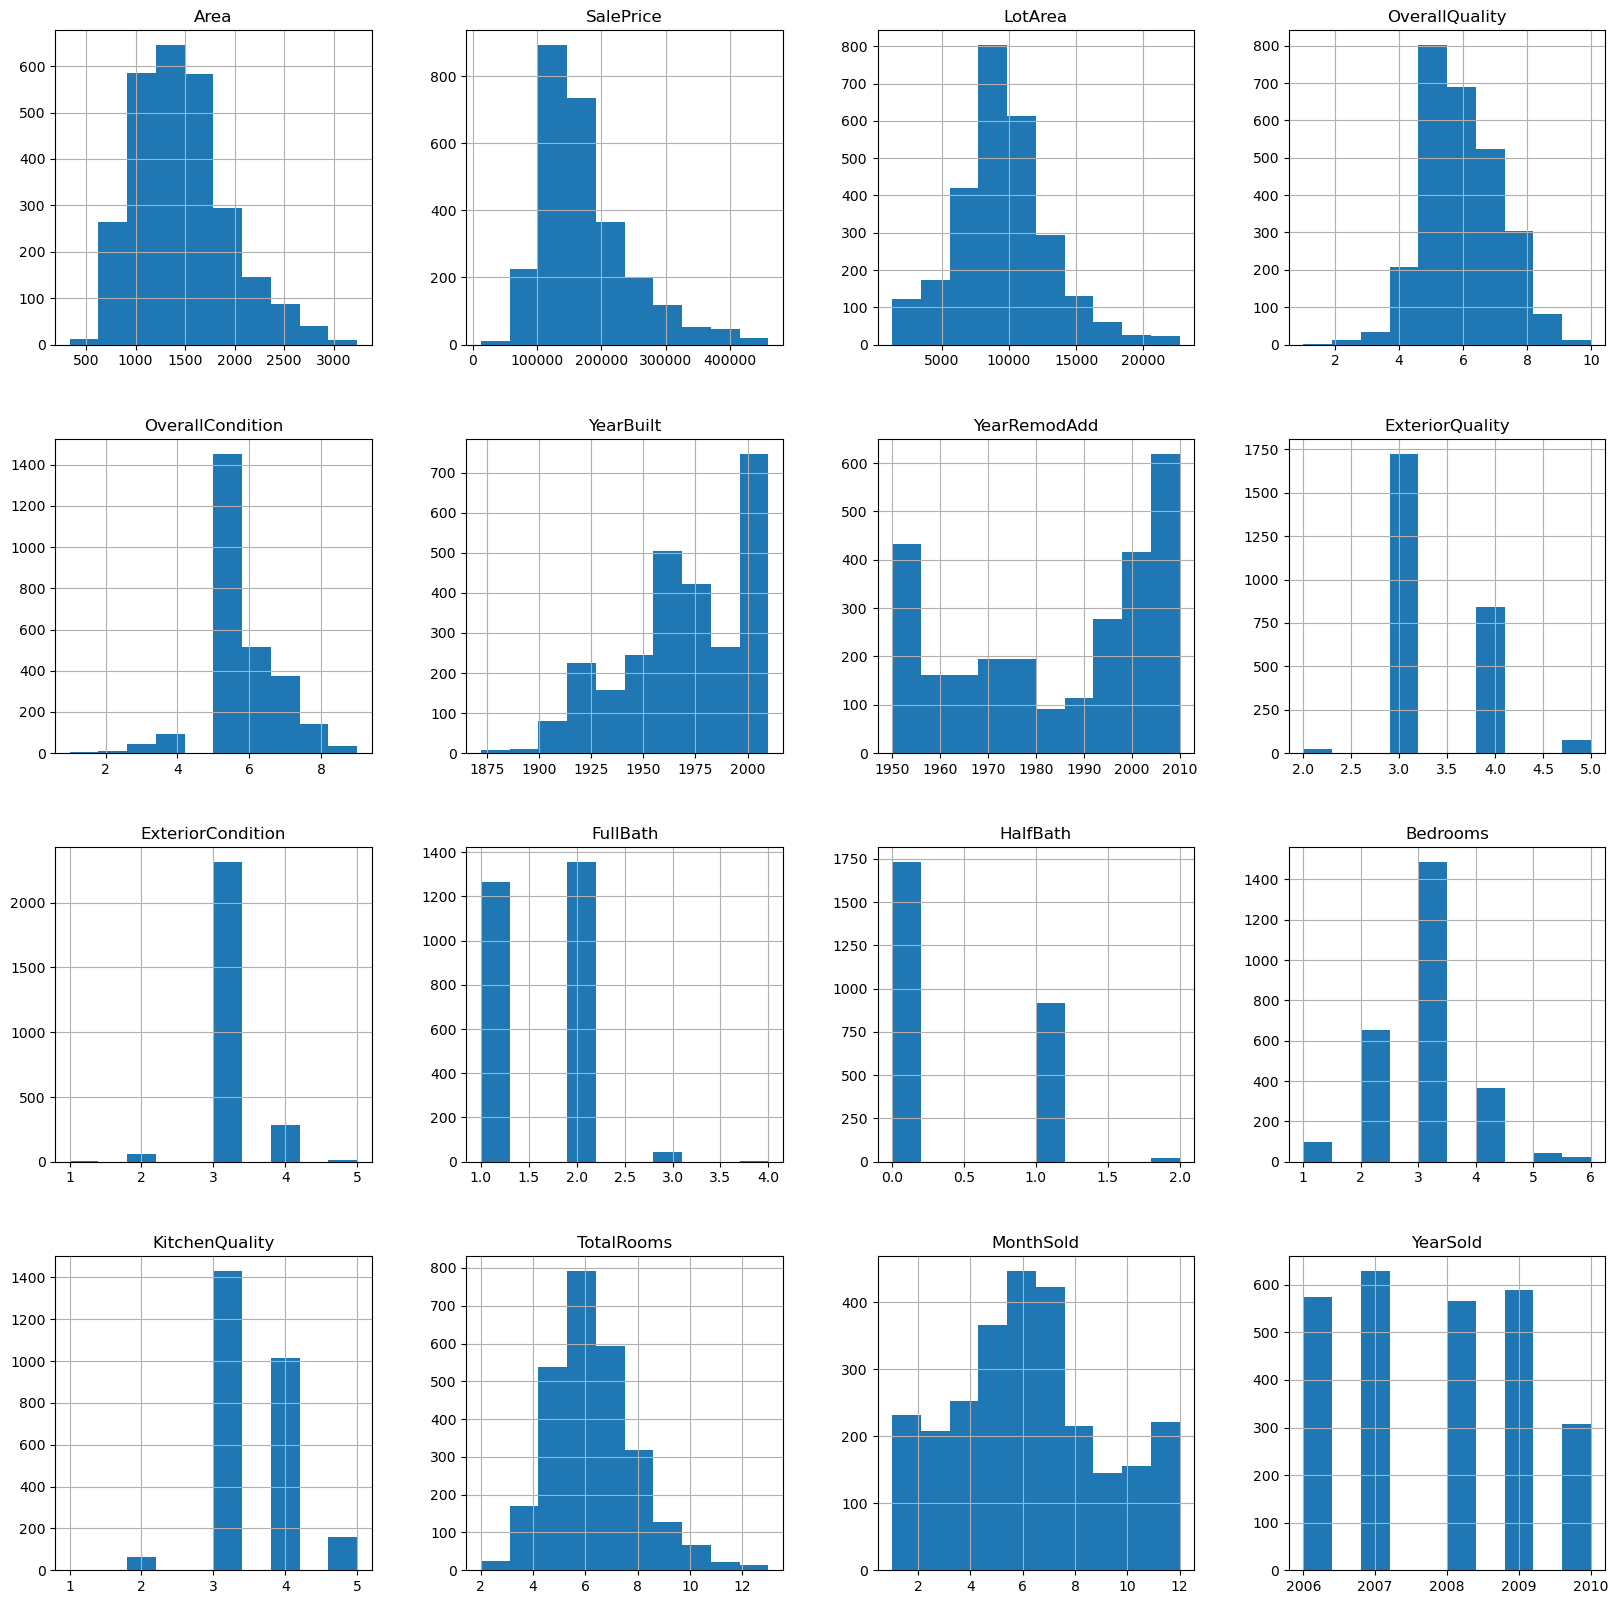

In [29]:
housing_cleaned.hist(bins=10, figsize=(20,20))
# found outliers in Area and LotArea attributes that should be removed (added to data cleaning section above)

C:\Users\Sammie\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

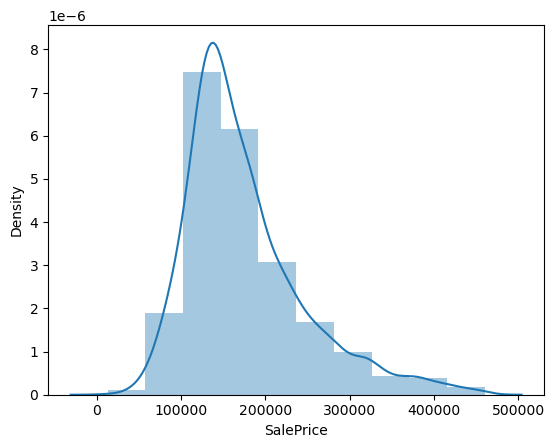

In [30]:
# view histogram of specific attributes
sns.distplot(housing_cleaned['SalePrice'],bins=10)

In [46]:
# tried to make boxplots for all attributes
# housing_cleaned.boxplot()

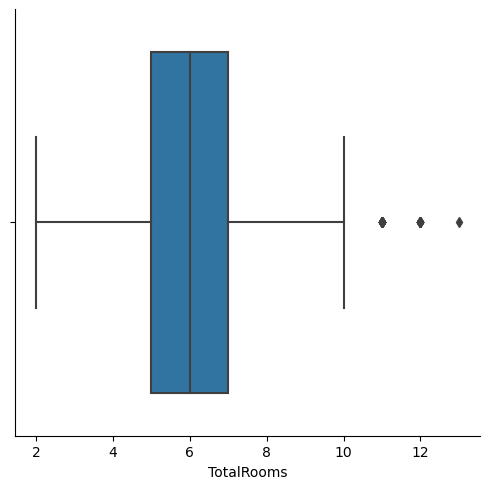

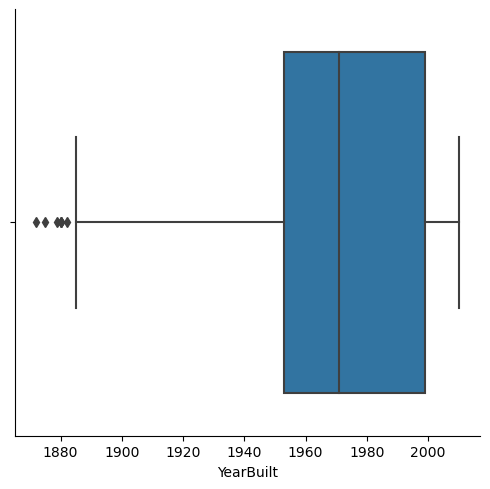

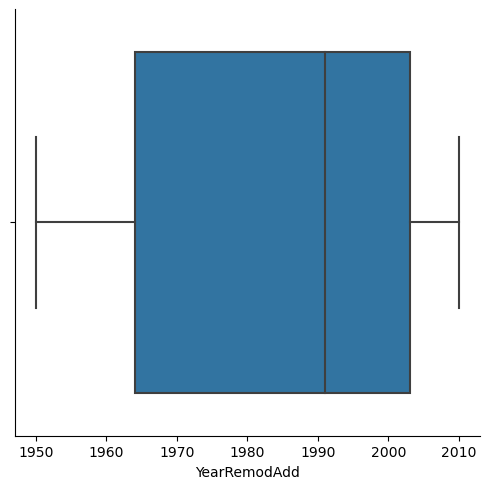

In [48]:
# box plot for specific attributes
sns.catplot(x='TotalRooms', kind='box', data=housing_cleaned)
sns.catplot(x='YearBuilt', kind='box', data=housing_cleaned)
sns.catplot(x='YearRemodAdd', kind='box', data=housing_cleaned)

## Bivariate Visualizations

In [33]:
# look at correlations compared to sale price
# Must use this with numeric values only or will give an error message

# only look at numeric attriutes
housing_cleaned_numeric = housing_cleaned._get_numeric_data()

# look at correlations (of numeric attributes) compared to sale price
housing_cleaned_numeric.corr()['SalePrice']

Area                 0.709923
SalePrice            1.000000
LotArea              0.415041
OverallQuality       0.814389
OverallCondition    -0.118217
YearBuilt            0.591710
YearRemodAdd         0.553605
ExteriorQuality      0.707736
ExteriorCondition    0.009667
FullBath             0.557272
HalfBath             0.279920
Bedrooms             0.150238
KitchenQuality       0.670570
TotalRooms           0.484627
MonthSold            0.042125
YearSold            -0.031725
Name: SalePrice, dtype: float64

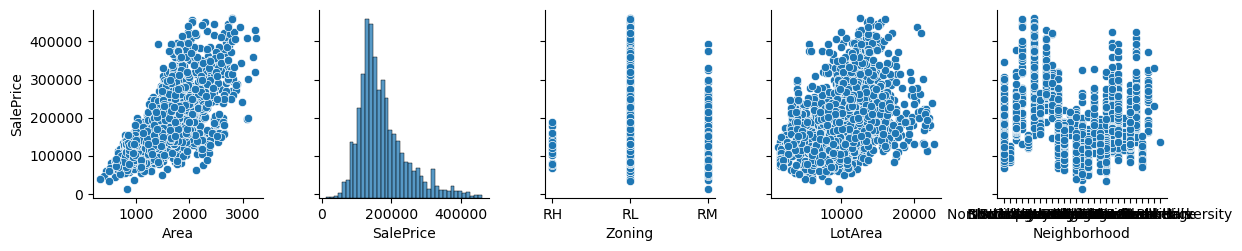

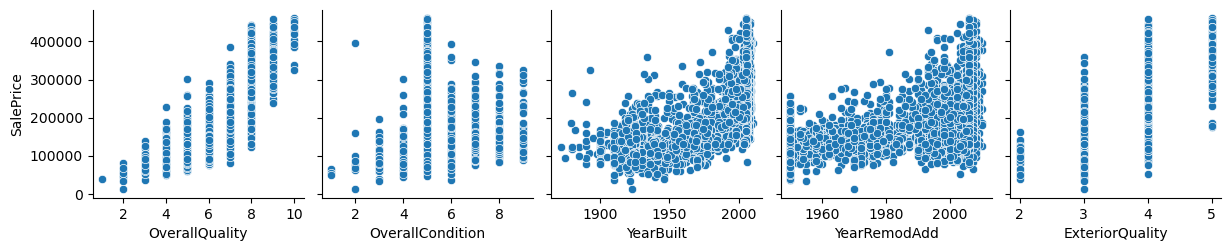

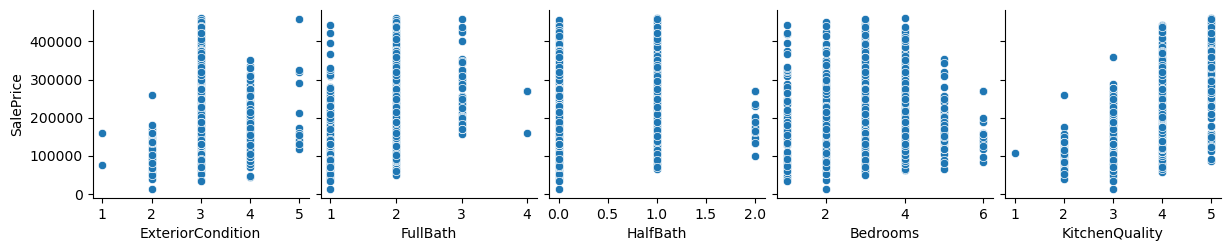

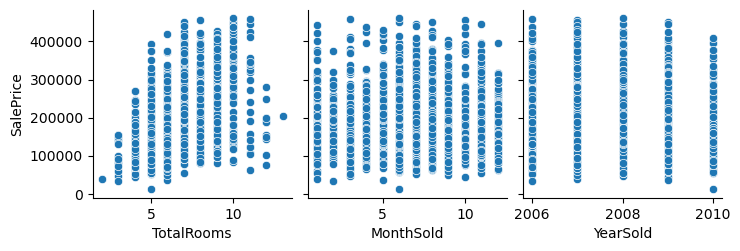

In [34]:
# scatterplots of sale price compared to each variable
plt.rcParams['figure.figsize']=(10,10)
for i in range(0, len(housing_cleaned.columns), 5):
    g=sns.pairplot(data=housing_cleaned,
                x_vars=housing_cleaned.columns[i:i+5],
                y_vars=['SalePrice'])

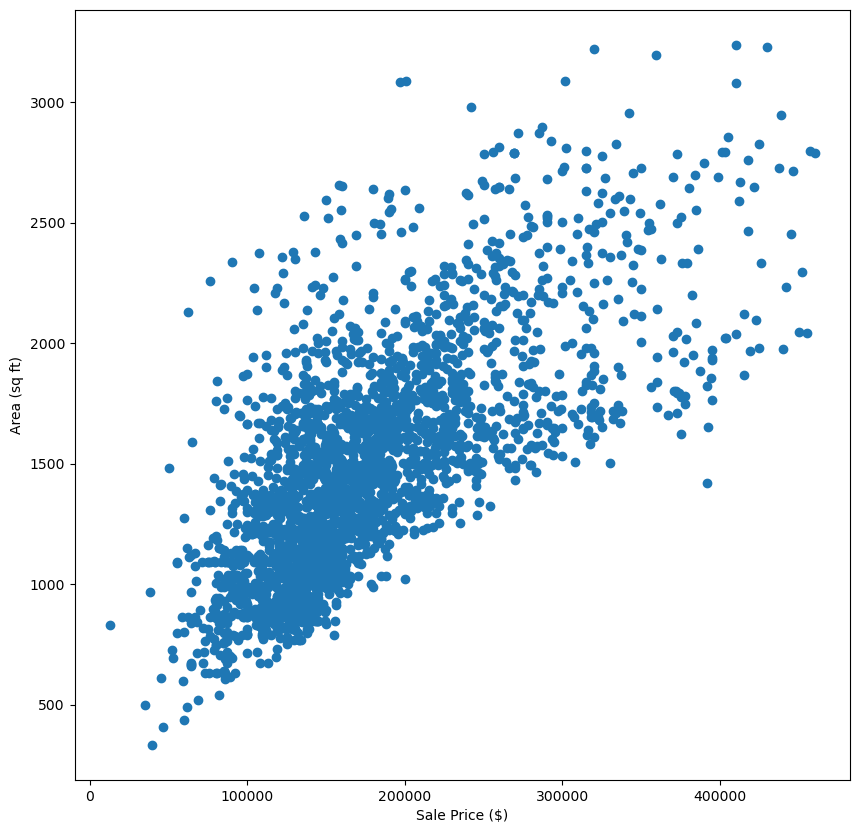

In [35]:
# scatter plot of Sale Price vs Area
price = housing_cleaned['SalePrice']
area = housing_cleaned['Area']
pyplt.scatter(price, area)
pyplt.xlabel('Sale Price ($)')
pyplt.ylabel('Area (sq ft)')
pyplt.show()

# scatter plot of Sale Price vs Area (with 
# quality = housing_cleaned['OverallQuality']
# scatter = plt.scatter(price, area, c=quality)
# plt.xlabel('price ($)')
# plt.ylabel('area (sq ft)')
# plt.legend(handles=scatter.legend_elements()[0],
           #title="species")
#plt.figlegend(quality)
# plt.show()

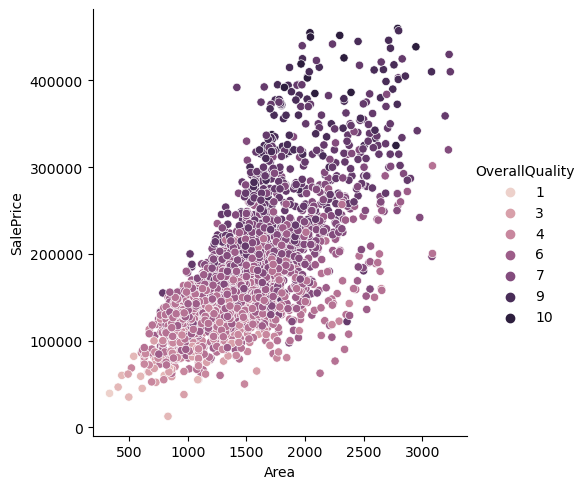

In [36]:
# scatterplot
# view correlation between two attributes 
# can split by a third attribute
sns.relplot(x='Area',y='SalePrice',hue='OverallQuality',data=housing_cleaned)

In [37]:
# average sale price per zone classification
pd.pivot_table(housing_cleaned,index = 'Zoning', values = 'SalePrice')
# zone RL has the highest sale price

SalePrice
Zoning               
RH      133974.384615
RL      186147.884051
RM      125421.406114

In [38]:
housing_new = housing_cleaned.rename(columns={'Area': 'Count of Sales'})

# count of sales per neighborhood and average sale price per neighborhood (sorted by highest average sale price)
# figure out how to rename area to number of sales
pivot = pd.pivot_table(housing_new,index = 'Neighborhood', values = ['SalePrice','Count of Sales'], aggfunc={'SalePrice':'mean','Count of Sales':'count'}).sort_values('SalePrice', ascending=False)
print(pivot)

                                       Count of Sales      SalePrice
Neighborhood                                                        
Northridge                                         64  306666.531250
Northridge Heights                                152  303522.407895
Stone Brook                                        43  290964.186047
Green Hills                                         2  280000.000000
Somerset                                           42  259513.023810
Veenker                                            22  246570.454545
Timberland                                         66  245738.681818
Crawford                                           99  205642.545455
College Creek                                     266  200776.379699
Bloomington Heights                                27  196752.814815
Clear Creek                                        31  194942.967742
Greens                                              8  193531.250000
Gilbert                           

In [39]:
housing_pivots = housing_cleaned[['Zoning', 'Neighborhood',
       'OverallQuality', 'OverallCondition', 'YearBuilt', 'YearRemodAdd',
       'ExteriorQuality', 'ExteriorCondition', 'FullBath', 'HalfBath',
       'Bedrooms', 'KitchenQuality', 'TotalRooms','SalePrice']]

for i in housing_pivots.columns:
    print(i)
    print(pd.pivot_table(housing_pivots, index=i, values='SalePrice').sort_values('SalePrice', ascending=False))
# clean out 0 bedroom data points
# homes remodeled more recently have a higher sale price
# higher overall quality, higher sale price
# higher exterior quality and condition, higher sale price
# higher kitchen quality, higher sale price


Zoning
            SalePrice
Zoning               
RL      186147.884051
RH      133974.384615
RM      125421.406114
Neighborhood
                                           SalePrice
Neighborhood                                        
Northridge                             306666.531250
Northridge Heights                     303522.407895
Stone Brook                            290964.186047
Green Hills                            280000.000000
Somerset                               259513.023810
Veenker                                246570.454545
Timberland                             245738.681818
Crawford                               205642.545455
College Creek                          200776.379699
Bloomington Heights                    196752.814815
Clear Creek                            194942.967742
Greens                                 193531.250000
Gilbert                                191528.050314
Sawyer West                            185239.608333
Mitchell              

ValueError: Grouper for 'SalePrice' not 1-dimensional

In [49]:
# descriptive statistics of Sale Price - grouped by neighborhood
housing_cleaned.groupby('Neighborhood').SalePrice.describe()

count           mean           std  \
Neighborhood                                                                
Bloomington Heights                     27.0  196752.814815  29871.948322   
Bluestem                                10.0  143590.000000  30158.523763   
Briardale                               30.0  105608.333333  12144.773839   
Brookside                              108.0  124756.250000  35740.935575   
Clear Creek                             31.0  194942.967742  48099.342265   
College Creek                          266.0  200776.379699  51620.707043   
Crawford                                99.0  205642.545455  64097.626271   
Edwards                                188.0  128161.255319  41882.341830   
Gilbert                                159.0  191528.050314  31767.781888   
Green Hills                              2.0  280000.000000  70710.678119   
Greens                                   8.0  193531.250000  21998.554133   
Iowa DOT and Rail Road                  68.0  114208.647059  32385.392054   
Landmark                                 1.0  137000.000000           NaN   
Meadow Village                          37.0   95756.486486  20130.564823   
Mitchell                               103.0  162356.174757  38421.741569   
Northpark Villa                         23.0  140710.869565   9340.283679   
Northridge                              64.0  306666.531250  48851.614721   
Northridge Heights                     152.0  303522.407895  74909.463859   
Northwest Ames                         570.0  154413.036842  37412.115779   
Old Town                               233.0  121492.111588  35943.720511   
Sawyer                                 148.0  137050.439189  23150.544729   
Sawyer West                            120.0  185239.608333  49044.648132   
Somerset                                42.0  259513.023810  50369.852057   
South & West of Iowa State University   46.0  134567.043478  29193.637090   
Stone Brook                             43.0  290964.186047  90637.540356   
Timberland                              66.0  245738.681818  68553.271921   
Veenker                                 22.0  246570.454545  57811.147094   

                                            min       25%       50%  \
Neighborhood                                                          
Bloomington Heights                    156820.0  174950.0  191000.0   
Bluestem                               115000.0  121725.0  130500.0   
Briardale                               83000.0   96250.0  106000.0   
Brookside                               39300.0  106425.0  126750.0   
Clear Creek                            107500.0  162750.0  190000.0   
College Creek                          110000.0  160437.5  200000.0   
Crawford                                90350.0  154200.0  199500.0   
Edwards                                 35000.0  103125.0  125000.0   
Gilbert                                141000.0  174000.0  183500.0   
Green Hills                            230000.0  255000.0  280000.0   
Greens                                 155000.0  183500.0  198000.0   
Iowa DOT and Rail Road                  50000.0   89875.0  117450.0   
Landmark                               137000.0  137000.0  137000.0   
Meadow Village                          71000.0   81000.0   88250.0   
Mitchell                                84500.0  135000.0  153500.0   
Northpark Villa                        120000.0  137700.0  143750.0   
Northridge                             190000.0  269342.5  295500.0   
Northridge Heights                     154000.0  250000.0  307500.0   
Northwest Ames                          68000.0  130250.0  147000.0   
Old Town                                12789.0  103200.0  119000.0   
Sawyer                                  62383.0  125000.0  135000.0   
Sawyer West                             67500.0  149750.0  181000.0   
Somerset                               147000.0  232000.0  249500.0   
South & West of Iowa State Uni

## Multivariate Visualizations

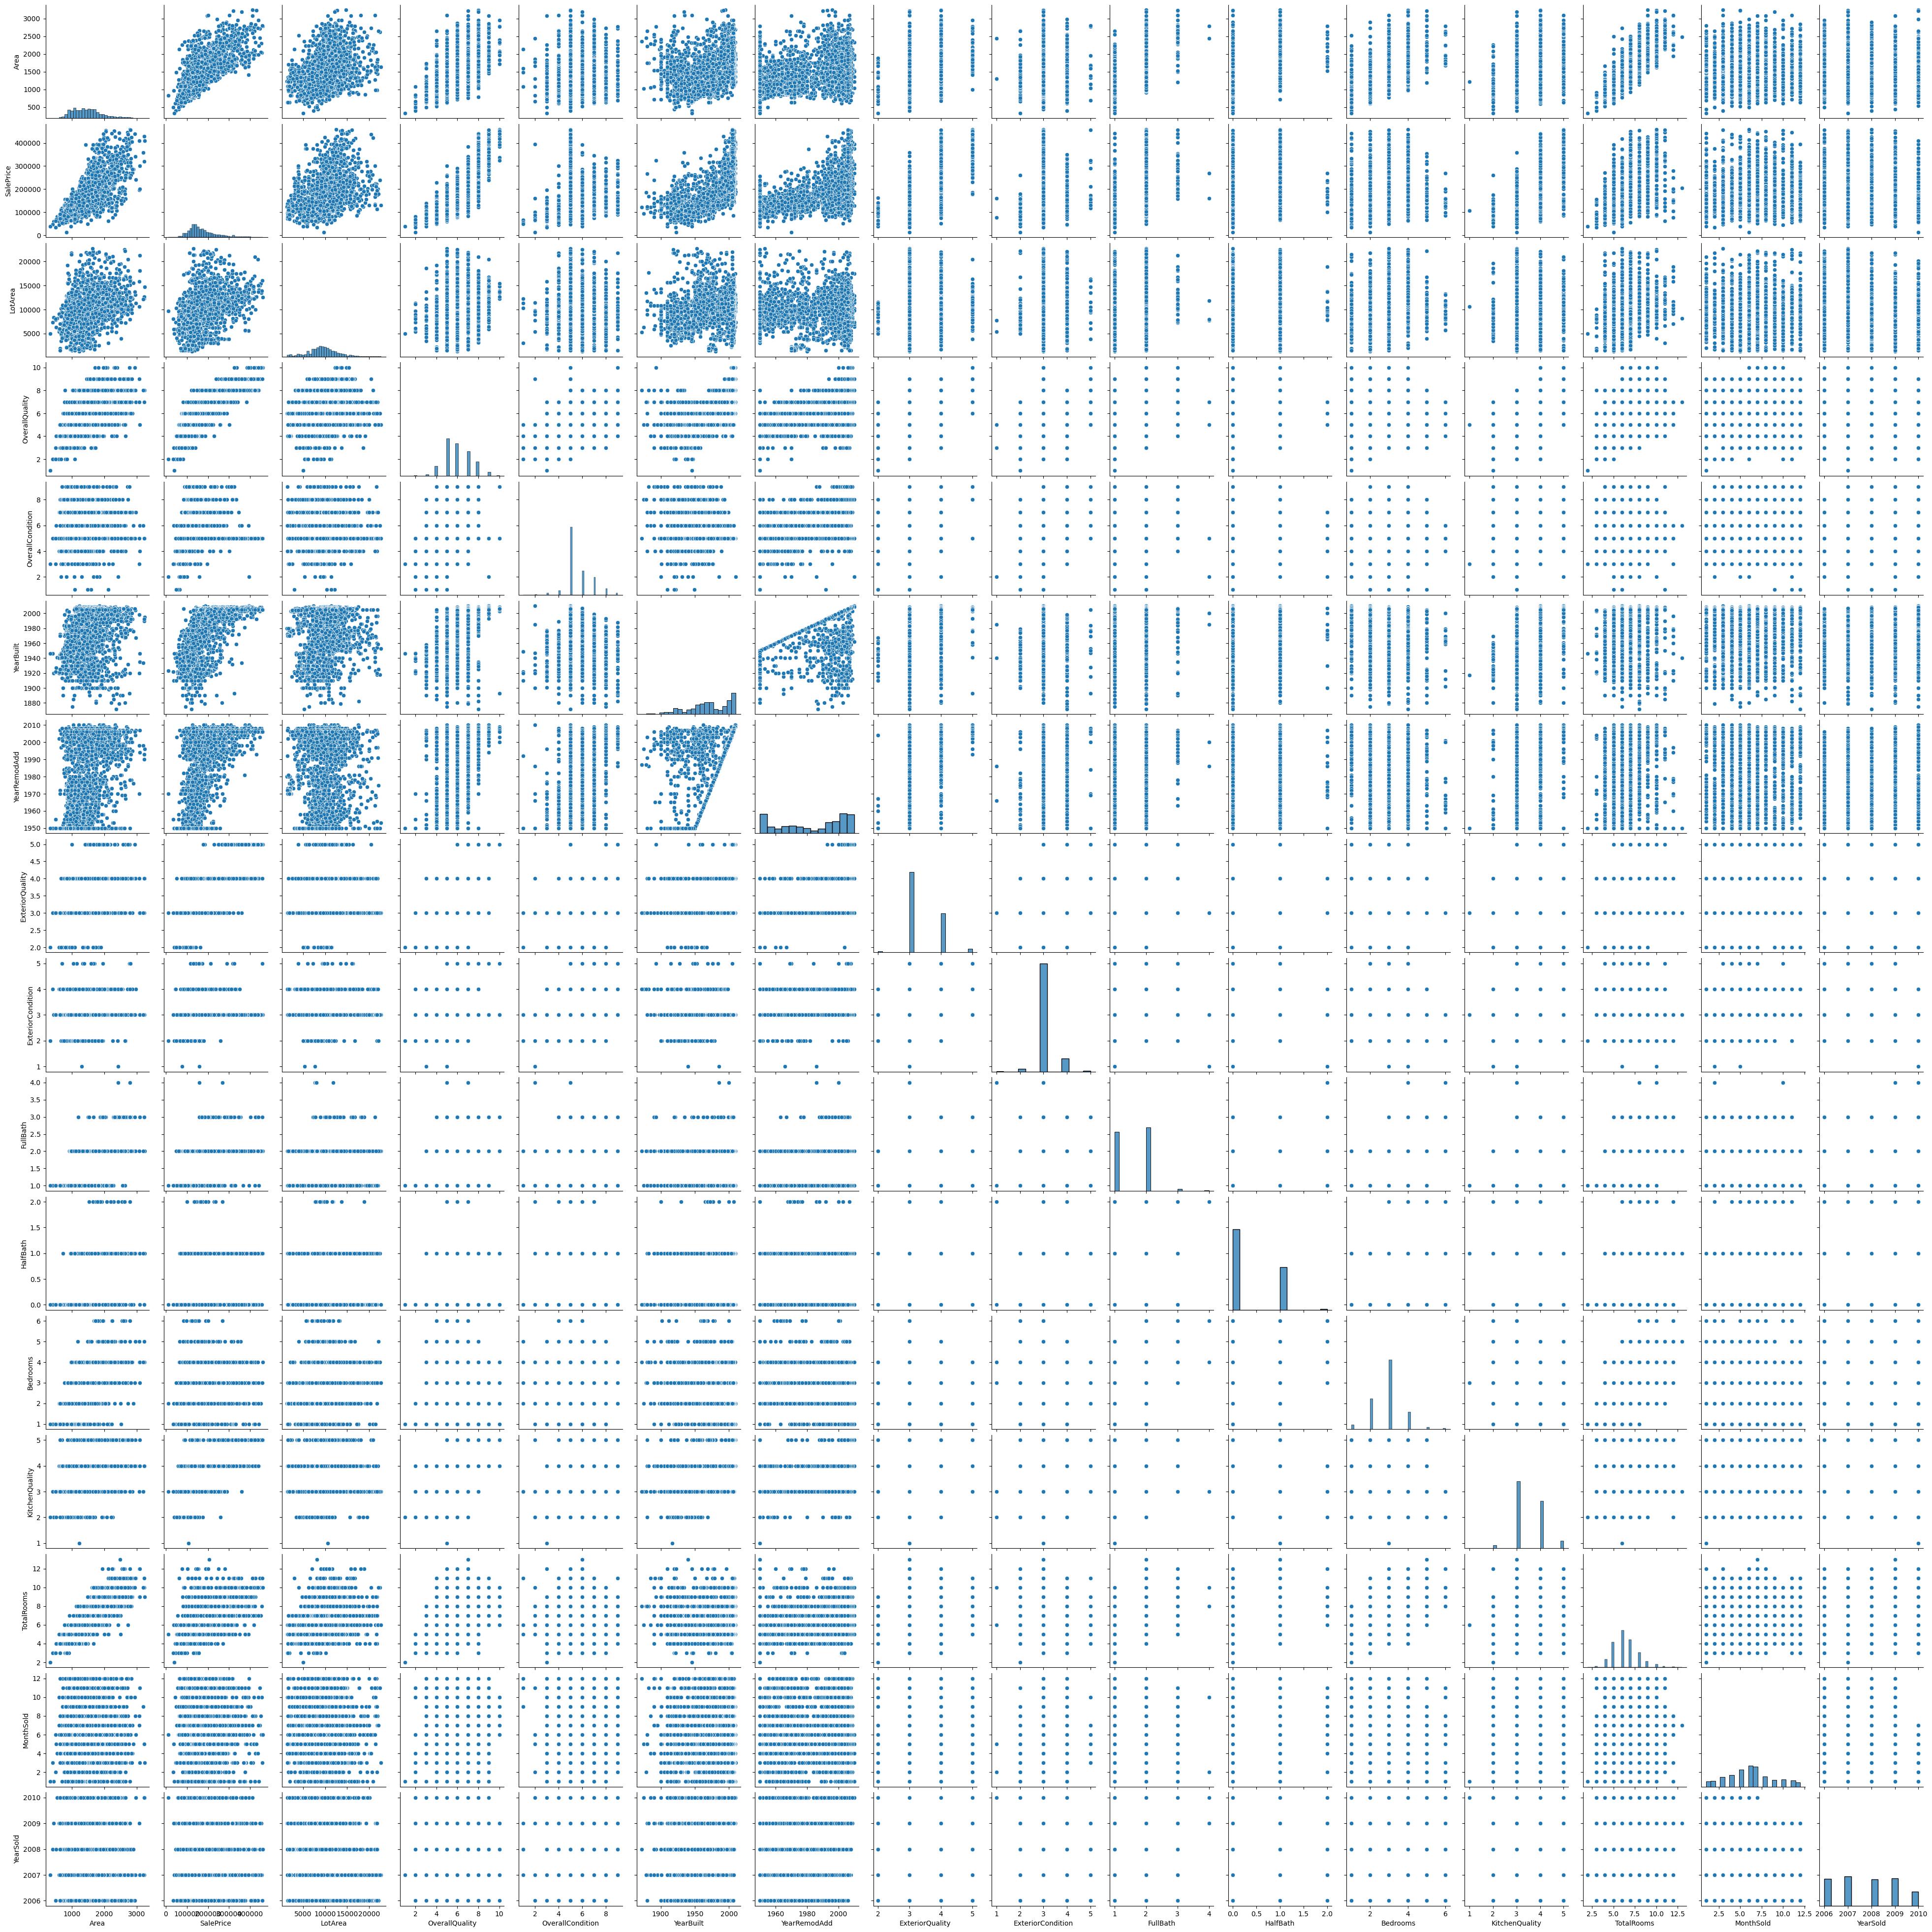

In [53]:
plt.rcParams['figure.figsize']=(20,20)

#view correlations for all attributes (numeric and non-numeric)
#sns.pairplot(housing_outliers)
sns.pairplot(housing_cleaned)

# not particularly useful because there are so many attributes that the charts are so small

In [ ]:
housingselections1 = ['SalePrice', 'Area', 'Zoning', 'LotArea', 'Neighborhood']
housingselections2 = ['SalePrice','OverallQuality', 'OverallCondition', 'YearBuilt', 'YearRemodAdd']
housingselections3 = ['SalePrice','ExteriorQuality', 'ExteriorCondition', 'FullBath', 'HalfBath']
housingselections4 = ['SalePrice','Bedrooms', 'KitchenQuality', 'TotalRooms', 'MonthSold', 'YearSold']
housing1 = housing_cleaned[housingselections1]
housing2 = housing_cleaned[housingselections2]
housing3 = housing_cleaned[housingselections3]
housing4 = housing_cleaned[housingselections4]

#view correlations for all attributes (numeric and non-numeric)
#sns.pairplot(housing_outliers)
sns.pairplot(housing1)
sns.pairplot(housing2)
sns.pairplot(housing3)
sns.pairplot(housing4)

array([[<AxesSubplot:xlabel='Area', ylabel='Area'>,
        <AxesSubplot:xlabel='SalePrice', ylabel='Area'>,
        <AxesSubplot:xlabel='LotArea', ylabel='Area'>,
        <AxesSubplot:xlabel='OverallQuality', ylabel='Area'>,
        <AxesSubplot:xlabel='OverallCondition', ylabel='Area'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='Area'>,
        <AxesSubplot:xlabel='YearRemodAdd', ylabel='Area'>,
        <AxesSubplot:xlabel='ExteriorQuality', ylabel='Area'>,
        <AxesSubplot:xlabel='KitchenQuality', ylabel='Area'>],
       [<AxesSubplot:xlabel='Area', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQuality', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallCondition', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>,
        <AxesSubplot:xlab

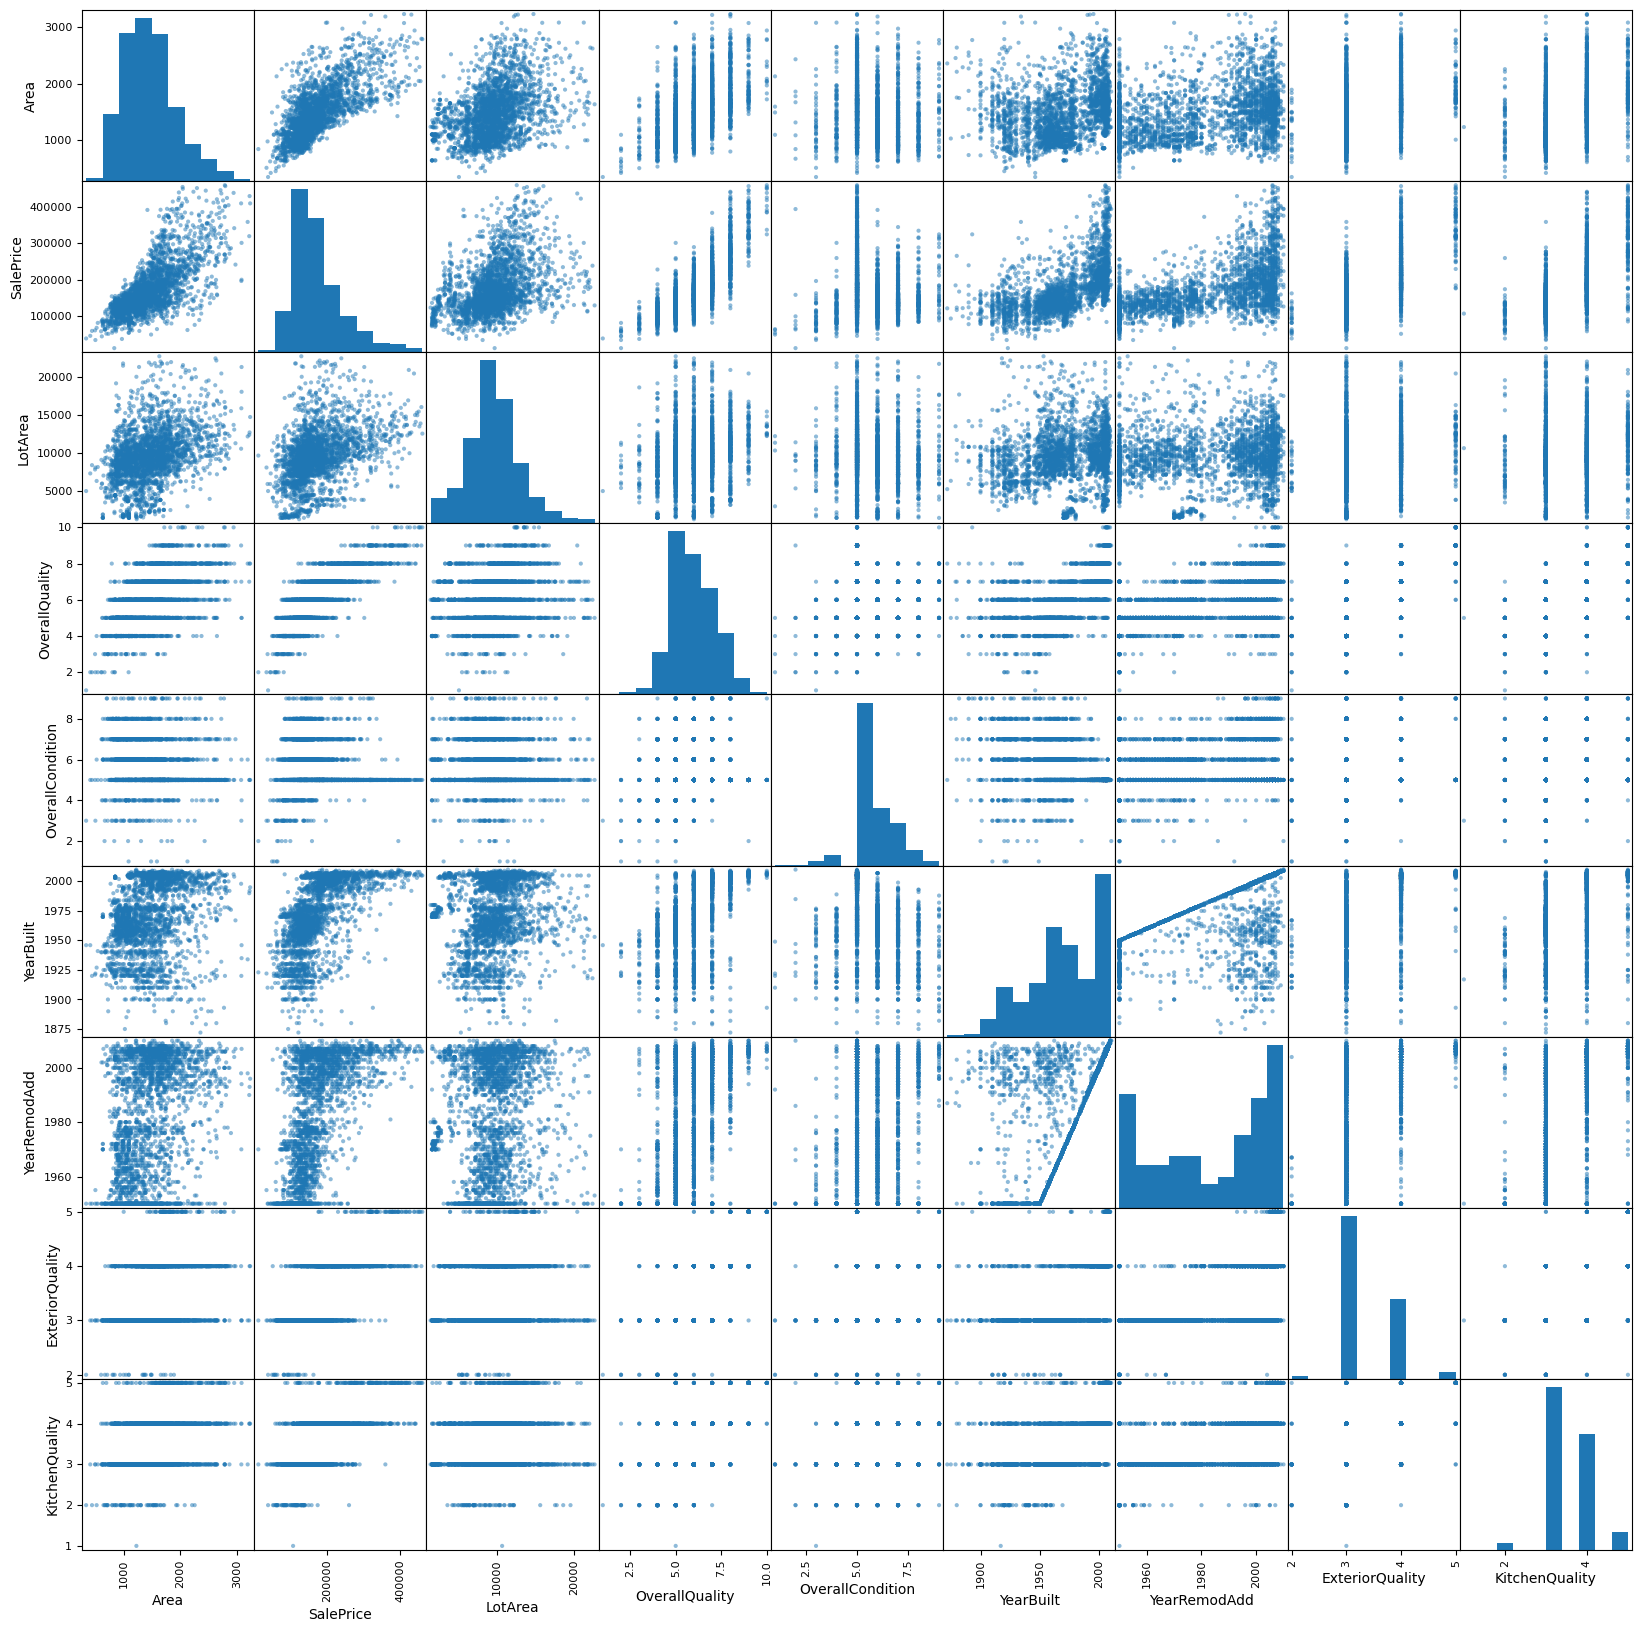

In [54]:
# quick visualization - comparing attributes to one another
# should I add more variables?
attributes = ['Area', 'SalePrice', 'LotArea', 'OverallQuality', 'OverallCondition', 'YearBuilt', 'YearRemodAdd', 'ExteriorQuality', 'KitchenQuality']
scatter_matrix(housing_cleaned[attributes])

In [43]:
housing_cleaned_numeric.corr()

Area  SalePrice   LotArea  OverallQuality  \
Area               1.000000   0.709923  0.392346        0.561654   
SalePrice          0.709923   1.000000  0.415041        0.814389   
LotArea            0.392346   0.415041  1.000000        0.205539   
OverallQuality     0.561654   0.814389  0.205539        1.000000   
OverallCondition  -0.137407  -0.118217 -0.062984       -0.101533   
YearBuilt          0.248634   0.591710  0.131764        0.582606   
YearRemodAdd       0.311654   0.553605  0.115139        0.548416   
ExteriorQuality    0.417148   0.707736  0.152873        0.714333   
ExteriorCondition -0.016541   0.009667  0.030005       -0.018895   
FullBath           0.641797   0.557272  0.227535        0.510668   
HalfBath           0.454971   0.279920  0.120385        0.250606   
Bedrooms           0.547040   0.150238  0.247015        0.070253   
KitchenQuality     0.403200   0.670570  0.162530        0.651382   
TotalRooms         0.810586   0.484627  0.330598        0.370710   
MonthSold          0.047796   0.042125  0.003255        0.026983   
YearSold          -0.017364  -0.031725 -0.021015       -0.021705   

                   OverallCondition  YearBuilt  YearRemodAdd  ExteriorQuality  \
Area                      -0.137407   0.248634      0.311654         0.417148   
SalePrice                 -0.118217   0.591710      0.553605         0.707736   
LotArea                   -0.062984   0.131764      0.115139         0.152873   
OverallQuality            -0.101533   0.582606      0.548416         0.714333   
OverallCondition           1.000000  -0.379102      0.052888        -0.146638   
YearBuilt                 -0.379102   1.000000      0.592577         0.584181   
YearRemodAdd               0.052888   0.592577      1.000000         0.586624   
ExteriorQuality           -0.146638   0.584181      0.586624         1.000000   
ExteriorCondition          0.411019  -0.096830      0.091821         0.024369   
FullBath                  -0.239081   0.470337      0.441681         0.454246   
HalfBath                  -0.071878   0.245507      0.193524         0.164074   
Bedrooms                  -0.031842  -0.033883     -0.015797        -0.044638   
KitchenQuality            -0.046351   0.513529      0.598631         0.691696   
TotalRooms                -0.114377   0.122207      0.198443         0.256060   
MonthSold                 -0.014951   0.014588      0.014715         0.033091   
YearSold                   0.040093  -0.018793      0.033285        -0.007053   

                   ExteriorCondition  FullBath  HalfBath  Bedrooms  \
Area                       -0.016541  0.641797  0.454971  0.547040   
SalePrice                   0.009667  0.557272  0.279920  0.150238   
LotArea                     0.030005  0.227535  0.120385  0.247015   
OverallQuality             -0.018895  0.510668  0.250606  0.070253   
OverallCondition            0.411019 -0.239081 -0.071878 -0.031842   
YearBuilt                  -0.096830  0.470337  0.245507 -0.033883   
YearRemodAdd                0.091821  0.441681  0.193524 -0.015797   
ExteriorQuality             0.024369  0.454246  0.164074 -0.044638   
ExteriorCondition           1.000000 -0.032500 -0.008867 -0.008005   
FullBath                   -0.032500  1.000000  0.160074  0.342518   
HalfBath                   -0.008867  0.160074  1.000000  0.296816   
Bedrooms                   -0.008005  0.342518  0.296816  1.000000   
KitchenQuality              0.039830  0.393623  0.169237 -0.011095   
TotalRooms                 -0.036639  0.534252  0.374636  0.684698   
MonthSold                   0.009309  0.039321  0.006694  0.047796   
YearSold                    0.027030  0.000343 -0.000180 -0.006601   

                   KitchenQuality  TotalRooms  MonthSold  YearSold  
Area                     0.403200    0.810586   0.047796 -0.017364  
SalePrice                0.670570    0.484627   0.042125 -0.031725  
LotArea                  0.162530    0.330598   0.003255 -0.021015  
OverallQuality       

In [42]:
housing_cleaned[['SalePrice','Area','LotArea']].corr()

SalePrice      Area   LotArea
SalePrice   1.000000  0.709923  0.415041
Area        0.709923  1.000000  0.392346
LotArea     0.415041  0.392346  1.000000

<AxesSubplot:>

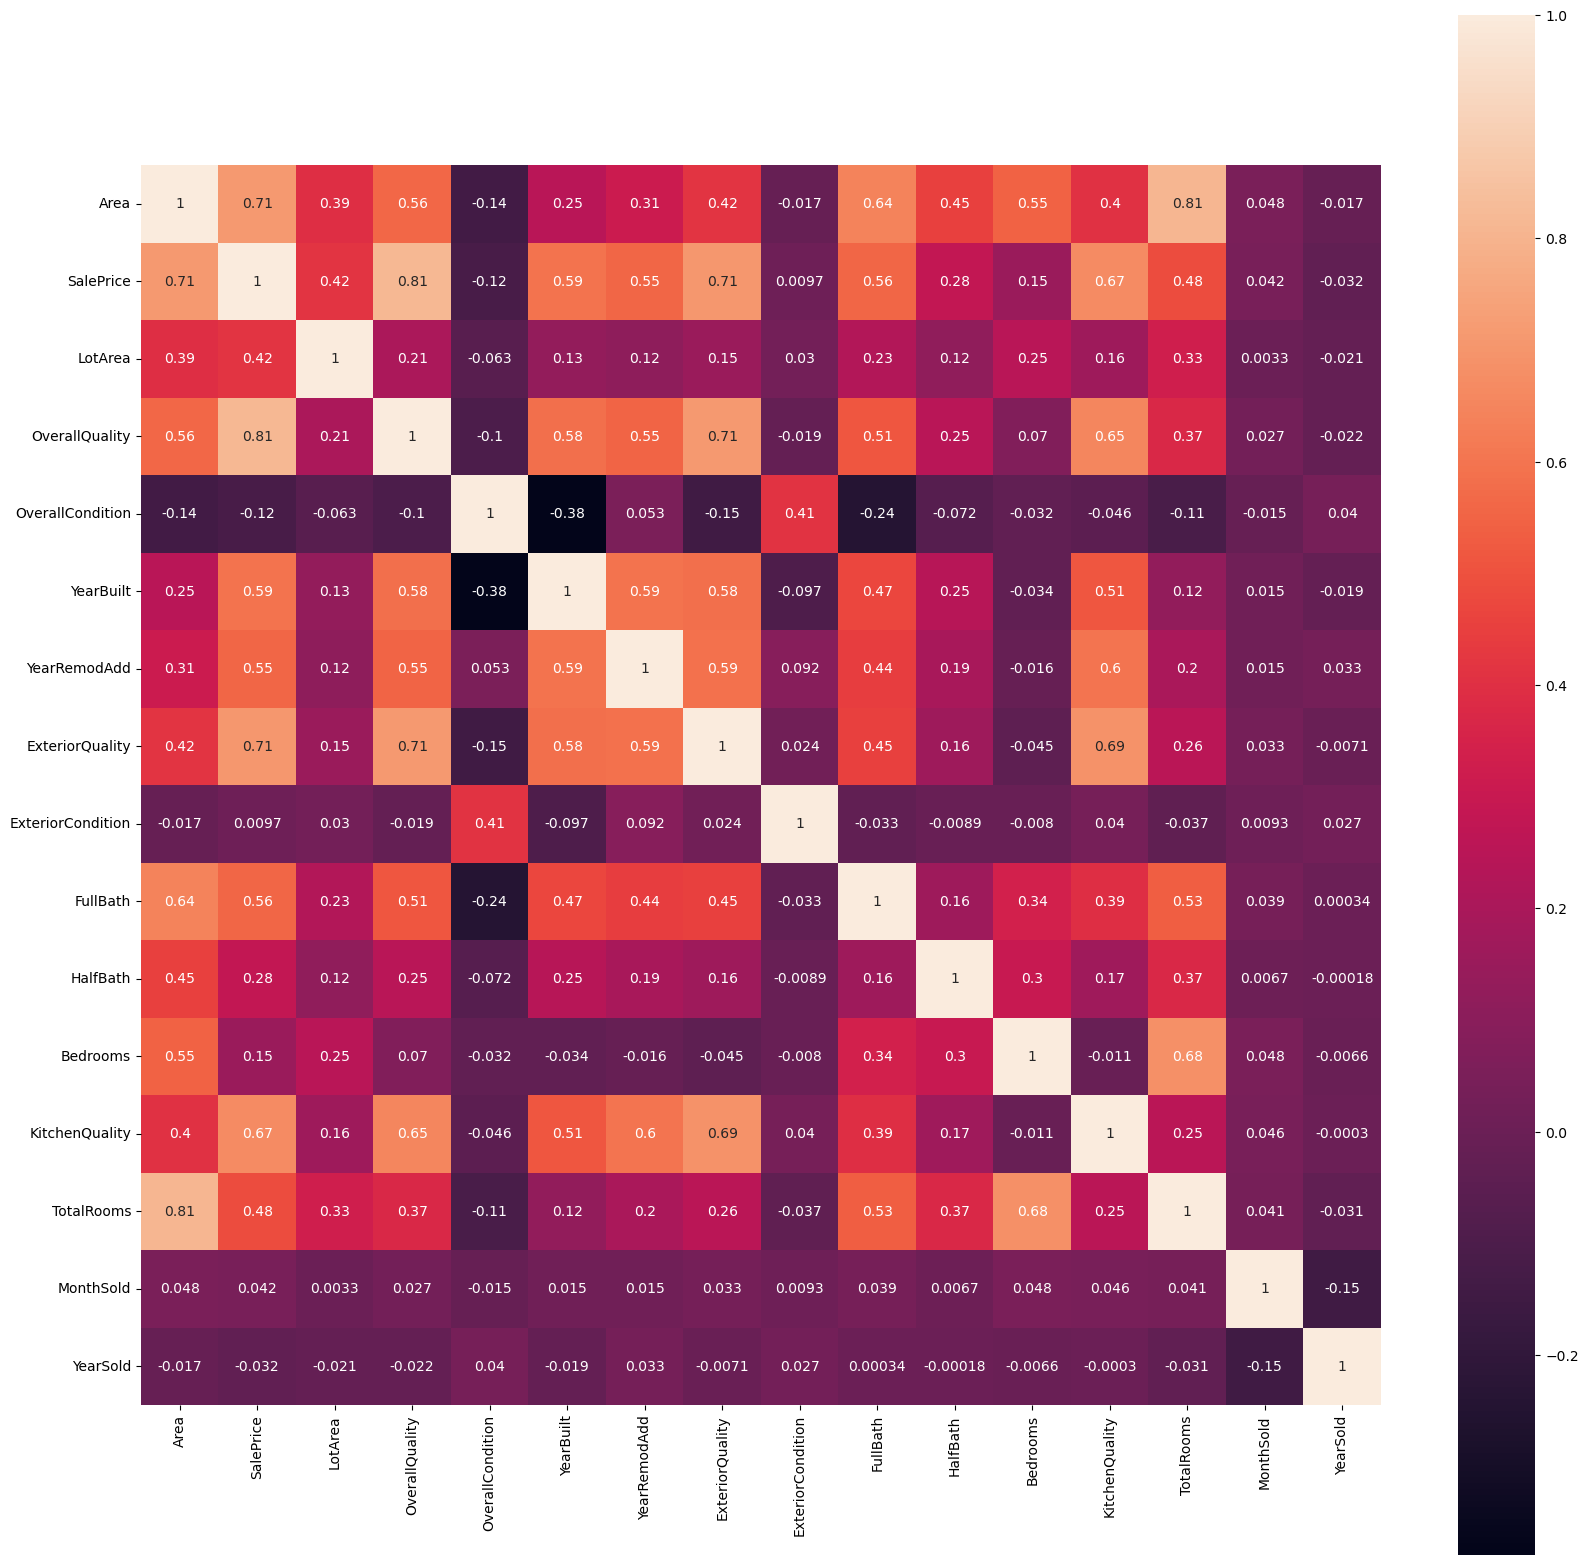

In [41]:
correlation = housing_cleaned_numeric.corr()
# Create heatmap to visualize correlations between attributes
# only for numeric attributes
fig, ax = pyplt.subplots(figsize=(20, 20))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True, square=True)
# no attributes with a high negative correlation to sale price

In [ ]:
# heatmap of specfic attributes
sns.heatmap(housing_cleaned[['SalePrice','Area','LotArea']].corr(), vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

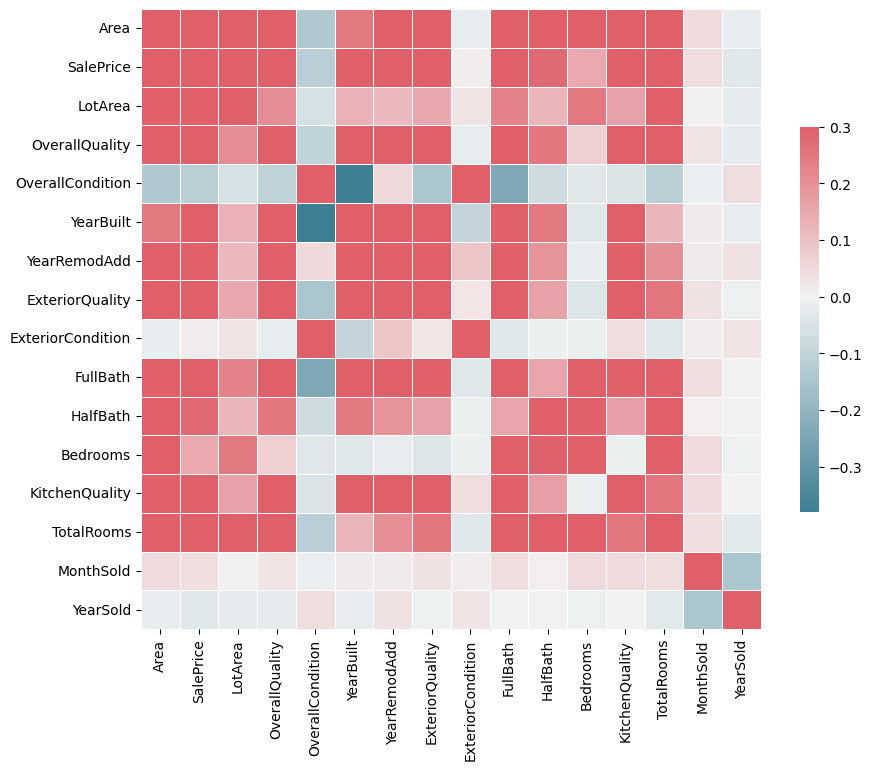

In [44]:
# heatmap of numeric attributes
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(housing_cleaned_numeric.corr(), cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [45]:
# average of each attribute per neighborhood - can change which variable it is sorted by
pd.pivot_table(housing_cleaned,index = 'Neighborhood', values = ['Area', 'LotArea', 'OverallQuality', 'OverallCondition', 'FullBath', 'HalfBath',
       'Bedrooms', 'KitchenQuality', 'TotalRooms']).sort_values('Area', ascending=False)
# Average area: Highest = Northridge, Lowest = Meadow Village
# Average Bedrooms: Highest = Northridge, Lowest = Greens
# Average FullBath: Highest = Northridge, Lowest = Greens
# Average HalfBath: Highest = Briardale, Lowest = Greens
# Average KitchenQuality: Highest = Northridge Heights, Lowest = Landmark
# Average LotArea: Highest = Veenker, Lowest = Briardale
# Average OverallCondition: Highest = Old Town, Lowest = Green Hills, Landmark, Stone Brook, and Bloomington Heights 
# Average OverallQuality: Highest = Stone Brook, Lowest = Meadow Village
# Average TotalRooms: Highest = Northridge, Lowest = Greens

Area  Bedrooms  FullBath  \
Neighborhood                                                             
Northridge                             2394.921875  3.562500  2.015625   
Northridge Heights                     1885.210526  2.723684  2.000000   
Stone Brook                            1837.441860  2.372093  1.953488   
Veenker                                1767.409091  2.409091  1.681818   
Clear Creek                            1711.741935  2.903226  1.645161   
Timberland                             1700.060606  2.863636  1.984848   
Crawford                               1697.252525  2.939394  1.494949   
Somerset                               1660.738095  2.833333  2.023810   
Gilbert                                1624.591195  3.113208  2.000000   
Sawyer West                            1605.683333  3.025000  1.808333   
South & West of Iowa State University  1592.869565  3.326087  1.543478   
College Creek                          1493.187970  2.834586  1.759398   
Old Town                               1409.836910  2.841202  1.321888   
Bloomington Heights                    1405.000000  1.888889  2.000000   
Green Hills                            1398.500000  1.500000  1.500000   
Northwest Ames                         1377.863158  2.989474  1.366667   
Landmark                               1320.000000  3.000000  2.000000   
Mitchell                               1304.834951  2.766990  1.495146   
Iowa DOT and Rail Road                 1255.073529  2.720588  1.264706   
Edwards                                1253.787234  2.856383  1.324468   
Northpark Villa                        1244.086957  2.565217  1.913043   
Brookside                              1234.907407  2.629630  1.138889   
Sawyer                                 1182.452703  2.952703  1.189189   
Bluestem                               1159.700000  1.900000  1.200000   
Greens                                 1157.250000  1.000000  1.000000   
Briardale                              1115.233333  2.566667  1.133333   
Meadow Village                         1066.702703  2.567568  1.108108   

                                       HalfBath  KitchenQuality       LotArea  \
Neighborhood                                                                    
Northridge                             0.906250        4.015625  11611.843750   
Northridge Heights                     0.407895        4.480263  10884.756579   
Stone Brook                            0.348837        4.232558   8937.162791   
Veenker                                0.590909        3.909091  13487.727273   
Clear Creek                            0.387097        3.322581  12873.193548   
Timberland                             0.333333        4.015152  11580.257576   
Crawford                               0.373737        3.464646  11127.626263   
Somerset                               0.261905        4.166667  11039.380952   
Gilbert                                0.830189        3.597484  10495.610063   
Sawyer West                            0.616667        3.766667   9983.416667   
South & West of Iowa State University  0.239130        3.043478   7569.413043   
College Creek                          0.432331        3.827068   9993.067669   
Old Town                               0.171674        3.227468   8058.545064   
Bloomington Heights                    0.000000        4.037037   3380.000000   
Green Hills                            0.500000        4.000000   9001.000000   
Northwest Ames                         0.308772        3.233333  10264.994737   
Landmark                               1.000000        3.000000   3612.000000   
Mitchell                               0.233010        3.252427  10397.427184   
Iowa DOT and Rail Road                 0.147059        3.088235   7894.544118   
Edwards                                0.164894        3.148936   9515.297872   
Northpark Villa                        0.521739        3.086957   2755.608696   
Brookside                           

# To-Do List

In [ ]:
# bar chart of number of sales per month and year

# bar chart of average sales per month and year (may need to combine month and year to make a date -- or do this in Excel)